# ECE 637 Deep Learning Lab Exercises


Name: Boris Diner

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [1]:
A = [1, 2, 3]
B = ['one', 'two', 'three']
C = A+B
print(C[0])
print(C[-2])
C.pop(1)
print(C)

1
two
[1, 3, 'one', 'two', 'three']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


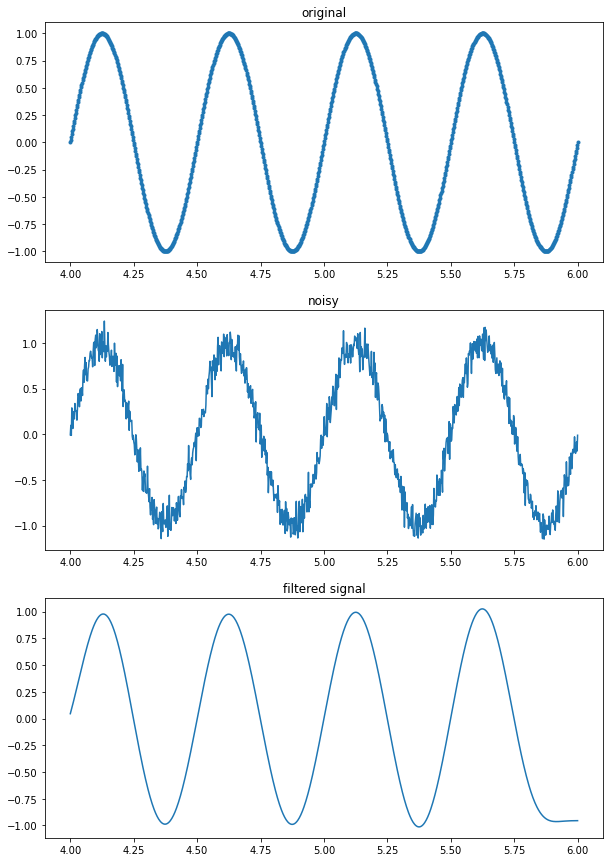

In [2]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

# The parameters of the sine wave
A = 1       # the peak amplitude of the sine wave
f = 2       # the frequency of the sine wave (Hz)
fs = 500    # the sampling frequency (Hz)

# Sampling
T = 1/fs    # the sampling period (s)
t1 = 4      # the starting time of sampling
t2 = 6      # the ending time of sampling
num_samples = int((t2 - t1) / T)    # the number of samples
t = np.linspace(t1, t2, num_samples)    # time samples

# The sine wave
x = A*np.sin(2*np.pi*f*t) 

# Normal noise with mean mu=0 and standard deviation sigma=0.1
mu, sigma = 0, 0.1
n = np.random.normal(mu, sigma, num_samples)

# Noisy signal
x_n = x+n

# Denoising with the low-pass butterworth filter of order 5 with 
# the cut-off frequency of 4 Hz  
fc = 4    # cutoff frequency of the Butterworth filter
w = fc / (fs / 2) # normalization of the frequency
b, a  = signal.butter(5, w)
y = signal.filtfilt(b, a, x_n) # denoising

# Displaying the results
plt.subplot(3,1,1)
plt.plot(t,x, '.')    # original signal
plt.title('original')
plt.subplot(3,1,2)
plt.plot(t,x_n)    # noisy signal
plt.title('noisy')
plt.subplot(3,1,3)
plt.plot(t,y)    # filtered signal
plt.title('filtered signal')

plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


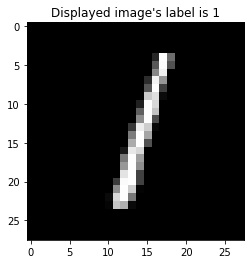

In [3]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

digit = test_images[2,:,:,0]
plt.imshow(digit, cmap='gray')
plt.title('Displayed image\'s label is ' + str(test_labels[2]))
plt.show()

## Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [4]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.4310 - accuracy: 0.8763
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1138 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.0676 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0

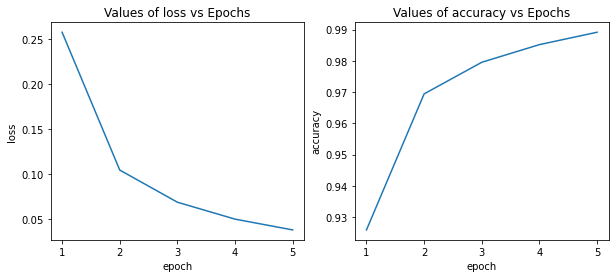

In [5]:
import matplotlib.pyplot as plt

hist_dict = hist.history
hist_dict_keys=[key for key in hist_dict.keys()]
num_epochs = len(hist_dict['loss'])
epochs = range(1, num_epochs+1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Values of loss vs Epochs')
plt.ylabel(hist_dict_keys[0])
plt.xlabel('epoch')
plt.plot(epochs, hist_dict['loss'])

plt.subplot(1, 2, 2)
plt.title('Values of accuracy vs Epochs')
plt.ylabel(hist_dict_keys[1])
plt.xlabel('epoch')
plt.plot(epochs, hist_dict['accuracy'])

plt.show()

## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



No. The neural network tend to "overfit" to the training data, therefore, making the network larger may cause more dependence on the training data, so the accuracy on the testing data will not always get better. There should be a trade-off between the complexity of the model and the accuracy of its performance on the testing data.

In [6]:
import keras
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [7]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 25s 50ms/step - loss: 0.5675 - accuracy: 0.8247
Epoch 2/5
469/469 [==============================] - 24s 51ms/step - loss: 0.1106 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.0711 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 27s 57ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0973 - accuracy: 0.9727
test_accuracy: 0.9726999998092651


# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [8]:
import keras
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', 
                          input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3, 3), activation='relu'))

network.add(layers.Flatten())

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                metrics=['accuracy'])
network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 112s 236ms/step - loss: 0.5286 - accuracy: 0.8319
Epoch 2/5
469/469 [==============================] - 82s 174ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 102s 216ms/step - loss: 0.0383 - accuracy: 0.9881
Epoch 4/5
469/469 [==============================] - 100s 212ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0274 - accuracy: 0.9916
test_accuracy: 0.991599977016449


# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

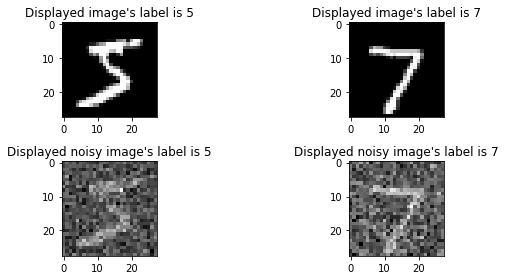

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

mu, sigma = 0, 0.4 # mean and variance of the noise

train_noise = np.random.normal(mu, sigma, train_images.shape)
test_noise = np.random.normal(mu, sigma, test_images.shape)

train_images_noisy = train_images_nor + train_noise
test_images_noisy = test_images_nor + test_noise

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

plt.figure(figsize=(10,4))

train_digit = train_images[0,:,:,0]
plt.subplot(2, 2, 1)
plt.imshow(train_digit, cmap='gray')
plt.title('Displayed image\'s label is ' + str(train_labels[0]))

test_digit = test_images[0,:,:,0]
plt.subplot(2, 2, 2)
plt.imshow(test_digit, cmap='gray')
plt.title('Displayed image\'s label is ' + str(test_labels[0]))

train_digit_noisy = train_images_noisy[0,:,:,0]
plt.subplot(2, 2, 3)
plt.imshow(train_digit_noisy, cmap='gray')
plt.title('Displayed noisy image\'s label is ' + str(train_labels[0]))

test_digit_noisy = test_images_noisy[0,:,:,0]
plt.subplot(2, 2, 4)
plt.imshow(test_digit_noisy, cmap='gray')
plt.title('Displayed noisy image\'s label is ' + str(test_labels[0]))
plt.tight_layout()
plt.show()

**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [11]:
encoding_dim = 32

# Build Encoder
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                          input_shape=train_images_noisy.shape[1:]))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(16, (3, 3),  activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', 
                          name='convOutput'))

encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))

# shape considerations
convShape = encoder.get_layer('convOutput').output_shape[1:]
denseShape = convShape[0]*convShape[1]*convShape[2]


# Build Decoder
decoder = models.Sequential()
decoder.add(layers.Dense(denseShape, input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(convShape))

decoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
decoder.add(layers.Conv2D(1, (3, 3),  activation='sigmoid', padding='same'))
            
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [12]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
convOutput (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

Epoch 1/20
235/235 [==============================] - 247s 1s/step - loss: 0.3316
Epoch 2/20
235/235 [==============================] - 251s 1s/step - loss: 0.1667
Epoch 3/20
235/235 [==============================] - 264s 1s/step - loss: 0.1352
Epoch 4/20
235/235 [==============================] - 187s 795ms/step - loss: 0.1256
Epoch 5/20
235/235 [==============================] - 197s 840ms/step - loss: 0.1201
Epoch 6/20
235/235 [==============================] - 187s 795ms/step - loss: 0.1172
Epoch 7/20
235/235 [==============================] - 181s 771ms/step - loss: 0.1145
Epoch 8/20
235/235 [==============================] - 189s 806ms/step - loss: 0.1125
Epoch 9/20
235/235 [==============================] - 182s 775ms/step - loss: 0.1109
Epoch 10/20
235/235 [==============================] - 180s 768ms/step - loss: 0.1096
Epoch 11/20
235/235 [==============================] - 181s 772ms/step - loss: 0.1082
Epoch 12/20
235/235 [==============================] - 180s 764ms/step -

**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [14]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, 
                      num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

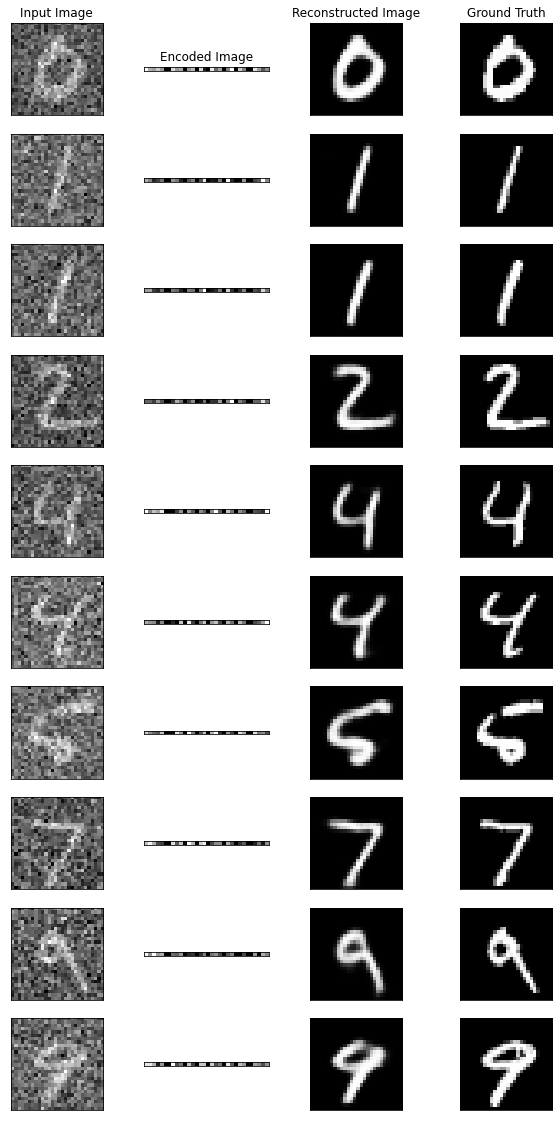

In [15]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I])
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=2, 
           groundTruth=test_images_nor[I])